### ANN With Customer Churn Prediction - Classification


### Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not.
### Dataset: https://www.kaggle.com/shrutimechlearn/churn-modelling

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv('Churn_Modelling.csv')

### Exploring the dataset

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


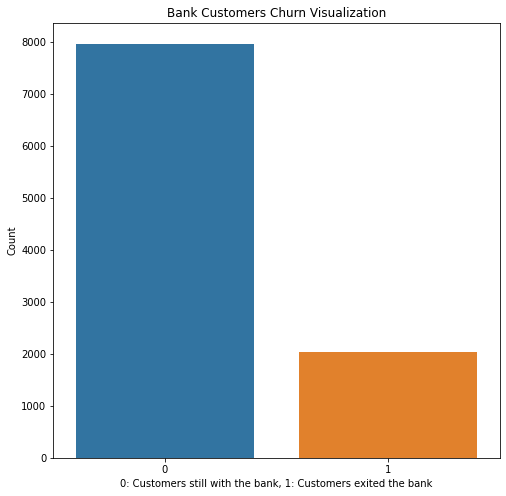

In [8]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [9]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
# X = df.iloc[:, 3:13]
# y = df.iloc[:, 13]

In [12]:
# df.isnull().sum()

## Feature Engineering
### Converting categorical features into numerical features using get_dummies()

In [13]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df["Geography"],drop_first=True)
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [14]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [15]:
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [16]:
df.drop(['Geography','Gender'], axis=1, inplace=True)

## Data Preprocessing

### • Split the dataset into independent features (ie: X) and label (ie: y).
### • Split the dataset further into train and test sets.
### • Apply feature scaling to train and test sets of independent features.

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [19]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building Artificial Neural Network (ANN)

In [21]:
import tensorflow
print(tensorflow.__version__)

2.3.1


In [22]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [23]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

# Adding Batch Normalization
classifier.add(BatchNormalization())

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 281
Trainable params: 261
Non-trainable params: 20
_________________________________________________________________


In [25]:
X_train.shape

(8000, 11)

In [26]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 100, epochs = 100)

Epoch 1/100
54/54 [==============================] - 1s 11ms/step - loss: 0.7467 - accuracy: 0.5553 - val_loss: 0.5994 - val_accuracy: 0.7425
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7264 - val_loss: 0.5512 - val_accuracy: 0.7732
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 0.7765 - val_loss: 0.5196 - val_accuracy: 0.7827
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5058 - accuracy: 0.7893 - val_loss: 0.4988 - val_accuracy: 0.7857
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4850 - accuracy: 0.7944 - val_loss: 0.4840 - val_accuracy: 0.7929
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 0.4713 - accuracy: 0.7992 - val_loss: 0.4727 - val_accuracy: 0.7959
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.8018 - val_loss: 0.4633 - val_accuracy: 0.7959
Epoch 8/100


Epoch 59/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8602 - val_loss: 0.3672 - val_accuracy: 0.8478
Epoch 60/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8623 - val_loss: 0.3680 - val_accuracy: 0.8470
Epoch 61/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8608 - val_loss: 0.3672 - val_accuracy: 0.8459
Epoch 62/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.8595 - val_loss: 0.3668 - val_accuracy: 0.8470
Epoch 63/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8651 - val_loss: 0.3662 - val_accuracy: 0.8482
Epoch 64/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8658 - val_loss: 0.3657 - val_accuracy: 0.8474
Epoch 65/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8632 - val_loss: 0.3662 - val_accuracy: 0.8451
Epoch 

In [27]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

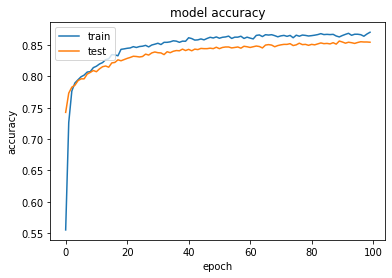

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

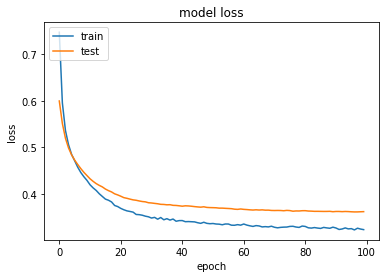

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [31]:
y_pred

array([[0.23127395],
       [0.2712769 ],
       [0.1110341 ],
       ...,
       [0.22352695],
       [0.14534977],
       [0.10169432]], dtype=float32)

In [32]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1505,   90],
       [ 200,  205]])

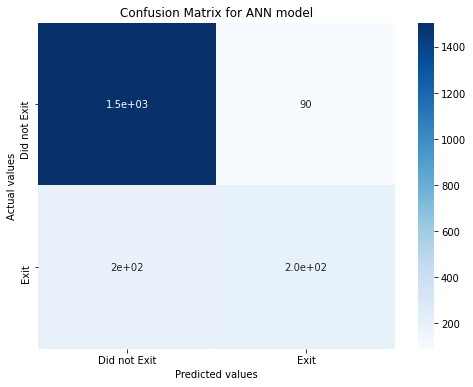

In [34]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [35]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 85.5%


In [36]:
score

0.855

## Predictions

In [37]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [38]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: Low change of exit.


In [39]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

Prediction: High change of exit!
